# Non Linear Regression

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN

In [2]:
hitters = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Hitters.csv')
df = hitters.copy()
df = df.dropna().reset_index(drop=True)
print('df\n',df.head(),'\n')

df_dummies = pd.get_dummies(df, drop_first=True)
print('df_dummies\n',df_dummies.head())

y = df['Salary']
X = df_dummies.drop('Salary', axis = 1)
print('y\n', y[:5],'\n')
print('X\n', X[:5])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


df
    AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    315    81      7    24   38     39     14    3449    835      69    321   
1    479   130     18    66   72     76      3    1624    457      63    224   
2    496   141     20    65   78     37     11    5628   1575     225    828   
3    321    87     10    39   42     30      2     396    101      12     48   
4    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0   414     375      N        W      632       43      10   475.0         N  
1   266     263      A        W      880       82      14   480.0         A  
2   838     354      N        E      200       11       3   500.0         N  
3    46      33      N        E      805       40       4    91.5         N  
4   336     194      A        W      282      421      25   750.0         A   

df_dummies
    AtBat  Hits  HmRun  Runs  RBI 

In [3]:
knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
print(knn_model.n_neighbors)

5


## Tahmin

In [4]:
y_pred = knn_model.predict(X_test)

#Test Hatasi.
print('Test Hatasi:',np.sqrt(mean_squared_error(y_test, y_pred)))

Test Hatasi: 426.6570764525201


In [5]:
# Egitim veri seti uzerinde k hyperparameter'e gore hata analizi yapiyoruz.
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  179.52761335480352
k = 3 için RMSE değeri:  205.20157172291863
k = 4 için RMSE değeri:  220.5139794876305
k = 5 için RMSE değeri:  239.6467132541376
k = 6 için RMSE değeri:  243.5904190007242
k = 7 için RMSE değeri:  258.1478781634636
k = 8 için RMSE değeri:  266.05374203349805
k = 9 için RMSE değeri:  269.73782093553376
k = 10 için RMSE değeri:  271.2798300436963


## Model Tuning

In [6]:
from sklearn.model_selection import GridSearchCV

# Burada fonksiyon icerisinde gecerli olan parametre adinin girilmesi gerekir.
knn_params = {'n_neighbors': np.arange(1,31,1)}

# Modelimizi olusturuyoruz.
knn_model = KNeighborsRegressor()

# Cross validation kismi.
knn_cv_model = GridSearchCV(knn_model, knn_params, cv=10)

print(knn_cv_model.fit(X_train, y_train).best_params_['n_neighbors'])
print(knn_cv_model.best_score_)

8
0.5591141972291036


In [7]:
# Modelin Valide edilmeden onceki hatasini ve valide edildikten sonraki hatasini kiyaslayalim.
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  325.3947514706382
k = 2 için RMSE değeri:  179.52761335480352 RMSE_CV değeri:  293.24000183333817
k = 3 için RMSE değeri:  205.20157172291863 RMSE_CV değeri:  283.7486667487823
k = 4 için RMSE değeri:  220.5139794876305 RMSE_CV değeri:  286.3240222024089
k = 5 için RMSE değeri:  239.6467132541376 RMSE_CV değeri:  290.0705466132226
k = 6 için RMSE değeri:  243.5904190007242 RMSE_CV değeri:  298.1263115575851
k = 7 için RMSE değeri:  258.1478781634636 RMSE_CV değeri:  294.77070479194987
k = 8 için RMSE değeri:  266.05374203349805 RMSE_CV değeri:  291.98672028891235
k = 9 için RMSE değeri:  269.73782093553376 RMSE_CV değeri:  295.7162739573105
k = 10 için RMSE değeri:  271.2798300436963 RMSE_CV değeri:  301.31047022701154


**Burada onemli husus valide edilmeden onceki haline bakip aa en az hata k=2'de var o zaman 2 yapalim demek degildir. Asil husus bunlarin valide edildikten sonraki degerlerine  bakmaktir. Cunku valide edilmeden once verisetimizden 2 parca ayrildi ve bunlar uzerinde deneme yapmis olduk, fakat bu is bu kadar cabuk bitemez bu modelin genellenebilirligi cok az olur. Bu yuzden genellenebilirligi artirmak ve garanti altina almak icin Cross Validation islemi yapiyoruz.**

In [8]:
# Knn_tuned
knn_tuned = KNeighborsRegressor(n_neighbors=8)

knn_tuned.fit(X_train, y_train)

#Tune edilmis modelin RMSE degeri
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

# Dogrusal SVR

## Model

In [32]:
hitters = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Hitters.csv')
df = hitters.copy()
df = df.dropna().reset_index(drop=True)

df_dummies = pd.get_dummies(df, drop_first=True)
print(df_dummies.head())

X = df_dummies.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    315    81      7    24   38     39     14    3449    835      69    321   
1    479   130     18    66   72     76      3    1624    457      63    224   
2    496   141     20    65   78     37     11    5628   1575     225    828   
3    321    87     10    39   42     30      2     396    101      12     48   
4    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  League_N  Division_W  \
0   414     375      632       43      10   475.0      True        True   
1   266     263      880       82      14   480.0     False        True   
2   838     354      200       11       3   500.0      True       False   
3    46      33      805       40       4    91.5      True       False   
4   336     194      282      421      25   750.0     False        True   

   NewLeague_N  
0         True  
1        False  
2         True  


Dogrusal regresyon ile arasindaki durumu degerlendirmek icin 2 degiskenli olarak yapacagiz.

In [33]:
X_train = pd.DataFrame(X_train['Hits'])
X_test = pd.DataFrame(X_test['Hits'])

In [34]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear').fit(X_train, y_train)

In [37]:
svr_model.predict(X_train)[:5]

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [63]:
# Denklemin formulu
print(f'y = {svr_model.intercept_[0]} + {svr_model.coef_[0][0]}x')

y = -48.69756097561513 + 4.969512195122093x


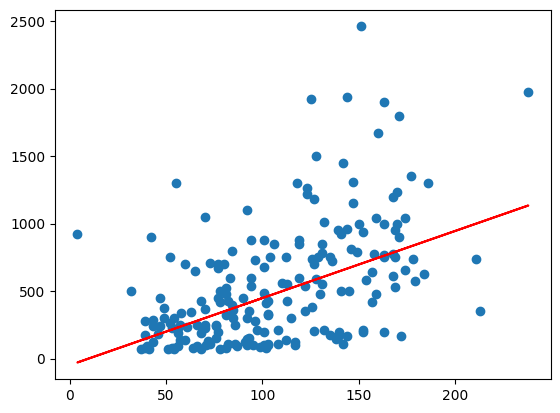

In [55]:
svr_train_pred = svr_model.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, svr_train_pred, color='r')
plt.show()

### SVR ve Linear Regresyon modeli kiyaslama yapalim.

In [59]:
# Linear Regression modeli
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_train_pred = lm_model.predict(X_train)
print('y = {0} + {1}x'.format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686x


In [60]:
# Ilk deger kiyaslamasi
print(svr_train_pred[:2],'\n',lm_train_pred[:2])

[403.52804878 666.91219512] 
 [461.87941285 736.01958803]


Text(0, 0.5, 'Maaş (Salary)')

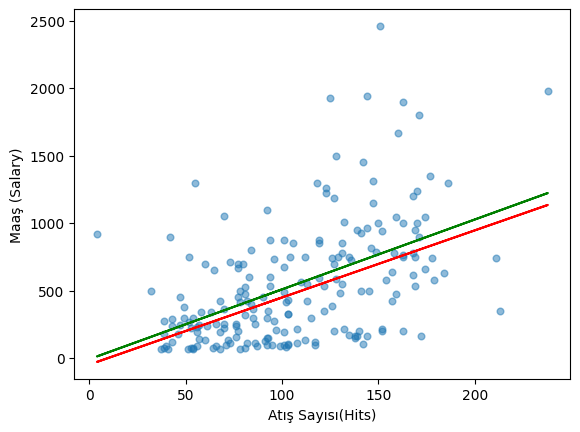

In [61]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_train_pred, 'g')
plt.plot(X_train, svr_train_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

## Tahmin

In [64]:
# Tahmin denklemi
print(f'y = {svr_model.intercept_[0]} + {svr_model.coef_[0][0]}x')

y = -48.69756097561513 + 4.969512195122093x


In [68]:
# x=91'ken modelin alacagi deger.
svr_model.predict([[91]])

array([403.52804878])

In [77]:
# Test hatasi hesaplama
svr_test_pred = svr_model.predict(X_test)
print('modelin test hatasi', np.sqrt(mean_squared_error(y_test, svr_test_pred)))

modelin test hatasi 459.0187960365147


## Model Tuning

SVR modelinde C karisiklik katsayisini tune edebiliriz.

In [71]:
svr_params = {'C' : np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [73]:
svr_cv_model.best_params_

{'C': 0.1}

In [76]:
# Tune edilmis modelimiz.
svr_model_tuned = SVR(C=svr_cv_model.best_params_['C'], kernel='linear').fit(X_train, y_train)

y_pred = svr_model_tuned.predict(X_test)
print('Modelin test hatasi : ',np.sqrt(mean_squared_error(y_test, y_pred)))

Modelin test hatasi :  458.198966781116


Yukariya kadar yaptiklarimizda SVR modeli kurarken yalnizca 'Hits' bagimsiz degiskeni uzerinden gittik. Peki diger degiskenleri de olaay katsak ne olurdu ?

##  Tum degiskenleri olaya dahil ettigimizdeki hali.

In [81]:
hitters = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Hitters.csv')
df = hitters.copy()
df = df.dropna().reset_index(drop=True)

df_dummies = pd.get_dummies(df, drop_first=True)
X = df_dummies.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [82]:
svr_params = {'C' : np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)

In [85]:
svr_cv_model.best_params_

{'C': 0.4}

In [86]:
svr_model_tuned = SVR(C=svr_cv_model.best_params_['C'], kernel='linear').fit(X_train, y_train)

y_pred = svr_model_tuned.predict(X_test)
print('Modelin test hatasi : ',np.sqrt(mean_squared_error(y_test, y_pred)))

Modelin test hatasi :  367.538528365296


Yukarida sadece Hits degiskenine gore model kurdugumuzda aldigimiz hata 458.198966781116 idi, suan ise 367.538528365296 oldu.

# Dogrusal Olmayan SVR

In [87]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [89]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

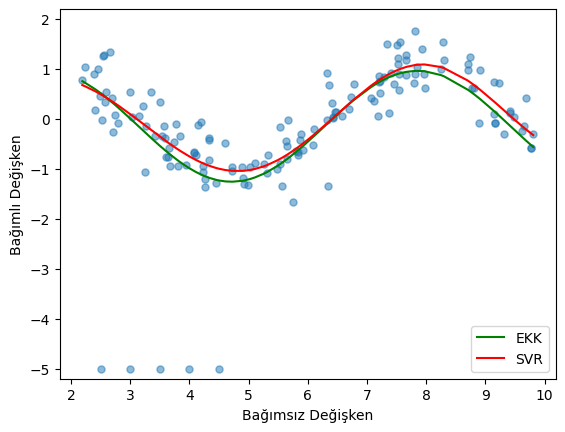

In [90]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("Bağımsız Değişken")
plt.ylabel("Bağımlı Değişken")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

## Model

In [101]:
hitters = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Hitters.csv')
df = hitters.copy()
df = df.dropna().reset_index(drop=True)

df_dummies = pd.get_dummies(df, drop_first=True)
X = df_dummies.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [102]:
svr_rbf_model = SVR(kernel='rbf').fit(X_train, y_train)

## Tahmin

In [103]:
y_pred = svr_rbf_model.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

## Model Tuning

In [105]:
svr_params = {'C': [0.1, 0.4, 5, 10, 20, 30 ,40, 50]}

svr_cv_rbf_model = GridSearchCV(svr_rbf_model, svr_params, cv=10)
svr_cv_rbf_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.4, 5, 10, 20, 30, 40, 50]})

In [107]:
y_pred_tuned = svr_cv_rbf_model.predict(X_test)
print('Tune edilmis modelin test hatasi : ', np.sqrt(mean_squared_error(y_test, y_pred_tuned)))

Tune edilmis modelin test hatasi :  428.00406888095694


# ANN - YSA - Multilayer Perceptron(Çok Katmanlı Algılayıcı) 

## Model

In [138]:
hitters = pd.read_csv('C:/Users/umutk/Documents/python_calismalar/Hitters.csv')
df = hitters.copy()
df = df.dropna().reset_index(drop=True)

df_dummies = pd.get_dummies(df, drop_first=True)
X = df_dummies.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

**YSA kullanirken donusturme(standartlastirma) gerekiyor. Aslinda butun modeller bu donusturme islemini sever fakat YSA da olmazsa olmazdir.**

In [139]:
from sklearn.preprocessing import StandardScaler

In [140]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [141]:
from sklearn.neural_network import MLPRegressor
# Burada (100,20) daha iyi gormek icin manuel ekledik.
mlp_model = MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_train_scaled, y_train)

In [142]:
# Kac katmanli ?
print(mlp_model.n_layers_)

# Gizli katman sayisi
print(mlp_model.hidden_layer_sizes)

4
(100, 20)


## Tahmin

In [144]:
print(mlp_model.predict(X_test_scaled)[:5])

y_pred = mlp_model.predict(X_test_scaled)

print('Test hatasi : ', np.sqrt(mean_squared_error(y_test, y_pred)))

[200.99015027 383.77757841 668.29573192 134.98043999 169.31335396]
Test hatasi :  436.6386436867762


## Model Tuning

In [146]:
mlp_params = {'alpha': [0.1, 0.01, 0.02, 0.005],
             'hidden_layer_sizes' : [(20,20), (100,50,150), (300,200,150)], 
             'activation' : ['relu', 'logistic']}

mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10)
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [147]:
# Optimum hyperparameter degerleri.

mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 50, 150)}

In [149]:
# Tuned model
mlp_tuned = MLPRegressor(hidden_layer_sizes=(100,50,150), alpha=0.005, activation='relu').fit(X_train_scaled, y_train)
y_pred = mlp_tuned.predict(X_test_scaled)

print('Tune edilmis model test hatasi : ', np.sqrt(mean_squared_error(y_test, y_pred)))

Tune edilmis model test hatasi :  351.8820894107845
